In [8]:

data = torch.load("datasets/CeleV-Text/processed_sdxl_512/aOSR0qNhJlM_3_0.pt",map_location='cpu')


In [1]:
import torch
data2 = torch.load("datasets/ffhq/processed_sd15_blank/000000000.pt",map_location='cpu')
for key in data2.keys():
    print(key)
    print(data2[key].shape)


latent
torch.Size([1, 4, 64, 64])
prompt_embeds
torch.Size([77, 768])
ref_images_latent
torch.Size([1, 4, 64, 64])
prompt


AttributeError: 'str' object has no attribute 'shape'

In [11]:
len(data["prompt_embeds_trigger"].shape)

3

In [9]:
for key in data.keys():
    print(key)
    print(data[key].shape)

latent
torch.Size([4, 16, 64, 64])
ref_images_latent
torch.Size([1, 4, 1, 64, 64])
face_ids
torch.Size([1, 512])
image_embeds
torch.Size([1, 257, 1280])
prompt_embeds
torch.Size([77, 2048])
pooled_prompt_embeds
torch.Size([1280])
prompt_embeds_trigger
torch.Size([77, 2048])
pooled_prompt_embeds_trigger
torch.Size([1280])
prompt


AttributeError: 'str' object has no attribute 'shape'

In [7]:
print(data)

{'video': tensor([[[[[-5.6925e-01, -9.9483e-01, -1.0092e+00,  ..., -5.1724e-01,
            -1.5194e+00, -1.5026e+00],
           [-6.5550e-01, -3.8380e-01, -8.3188e-01,  ..., -1.4978e+00,
            -8.4553e-01, -1.4986e+00],
           [-3.1821e-01, -5.6923e-01, -4.7527e-01,  ..., -1.6703e+00,
            -9.4404e-01, -1.5886e+00],
           ...,
           [-8.8517e-01, -3.5274e-01, -5.8983e-01,  ..., -1.2884e+00,
            -5.3110e-01, -4.2583e-01],
           [ 6.0419e-01,  1.2255e+00,  1.6383e+00,  ..., -7.9398e-01,
            -6.4814e-01,  8.9559e-02],
           [ 1.2311e+00,  1.1979e+00,  7.6779e-01,  ..., -1.6111e-01,
            -1.9499e-01, -1.9635e-01]],

          [[-8.2030e-01, -5.8706e-01, -5.1345e-01,  ..., -1.9812e+00,
            -1.3392e+00, -1.8679e+00],
           [-7.3591e-02, -5.2794e-01, -1.0164e+00,  ..., -1.2814e+00,
            -1.6577e+00, -2.0197e+00],
           [-5.9802e-01, -2.6066e-02, -9.7648e-01,  ..., -2.0794e+00,
            -1.5143e+00, -2.12

In [4]:
data['processed_sdxl_512/aOSR0qNhJlM_3_0.pt']

torch.float32

In [5]:
data.keys()

dict_keys(['latent', 'image_embeds', 'prompt_embeds', 'pooled_prompt_embeds', 'class_tokens_mask', 'prompt_embeds_trigger', 'pooled_prompt_embeds_trigger', 'prompt', 'prompt_trigger', 'face_ids'])

In [6]:
data['image_embeds'].dtype

torch.float16

In [8]:
data['prompt_embeds'].dtype

torch.float32

In [9]:
data['pooled_prompt_embeds'].dtype

torch.float32

In [10]:
data['class_tokens_mask'].dtype

torch.bool

In [12]:
data['prompt_embeds_trigger'].dtype

torch.float32

In [13]:
for key in data.keys():
    print(data[key].dtype)

torch.float32
torch.float16
torch.float32
torch.float32
torch.bool
torch.float32
torch.float32


AttributeError: 'str' object has no attribute 'dtype'

In [1]:
import cv2
import numpy as np
from insightface.app import FaceAnalysis
from insightface.utils import face_align
from PIL import Image
# Load face encoder
app = FaceAnalysis(name="buffalo_l",
                    root="./pretrain_model",
                    providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

image = Image.open("datasets/Famous_people/Elon_Musk.jpg").convert('RGB')
image = np.array(image)
# image = resize_img(image)
face_info = app.get(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
face_info = sorted(face_info, key=lambda x:(x['bbox'][2]-x['bbox'][0])*(x['bbox'][3]-x['bbox'][1]))[-1] # only use the maximum face



/data/miniconda3/envs/env-novelai/lib/python3.10/site-packages/albumentations/check_version.py:49: UserWarning: Error fetching version info <urlopen error [Errno 101] Network is unreachable>
  data = fetch_version_info()
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./pretrain_model/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./pretrain_model/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./pretrain_model/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./pretrain_model/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['

In [14]:
image.shape

(1252, 1252, 3)

In [2]:
norm_face = face_align.norm_crop(image, landmark=face_info.kps, image_size=512)

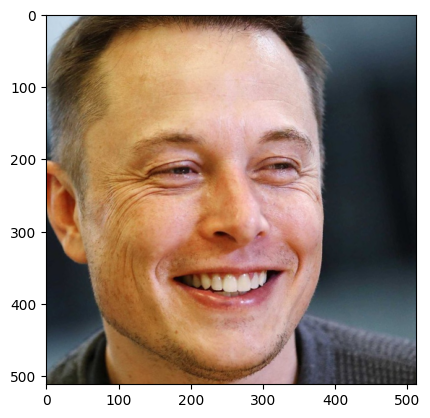

In [3]:
import matplotlib.pyplot as plt

plt.imshow(norm_face)

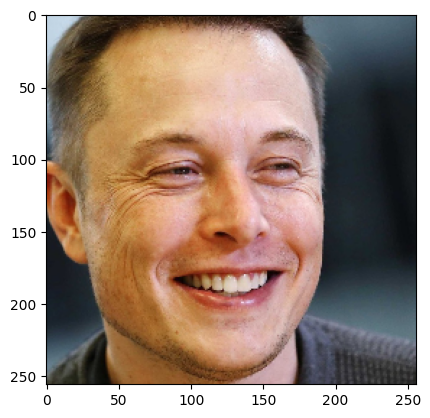

In [4]:
norm_face2 = face_align.norm_crop(image, landmark=face_info.kps, image_size=256)


plt.imshow(norm_face2)

In [6]:
bbox = face_info.bbox.astype(int)
x1, y1, x2, y2 = bbox[:4]
face_image = image[y1:y2, x1:x2,:]

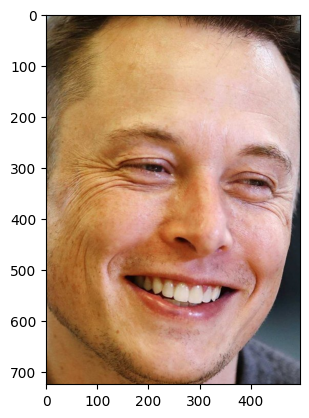

In [7]:
plt.imshow(face_image)

In [12]:
def rectangle_to_square_and_resize(arr, target_size=512):
    # 获取数组的形状
    height, width = arr.shape[:2]
    
    # 确定长边和短边的长度
    max_side = max(height, width)
    
    # 创建一个新的正方形数组，边长为长边的长度
    square_arr = np.full((max_side, max_side) + arr.shape[2:], arr.max(), dtype=arr.dtype)
    
    # 计算原数组在新数组中的起始位置
    start_y = (max_side - height) // 2
    start_x = (max_side - width) // 2
    
    # 将原数组的内容复制到新数组的中心位置
    square_arr[start_y:start_y+height, start_x:start_x+width] = arr
    
    # 将正方形数组 resize 到目标大小
    resized_arr = cv2.resize(square_arr, (target_size, target_size), interpolation=cv2.INTER_AREA)

    return resized_arr

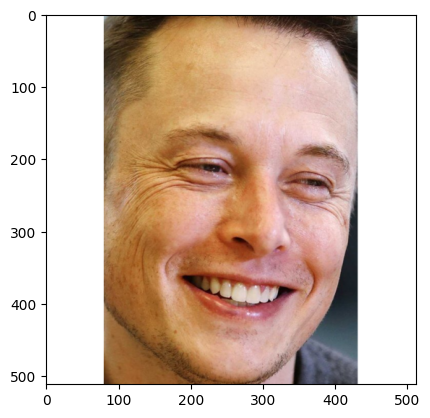

In [13]:
ref_image = rectangle_to_square_and_resize(image[y1:y2, x1:x2,:])
plt.imshow(ref_image)

In [15]:
import torch
data = torch.load('checkpoints/sd15_latent_image_8v100-ref-noisy-cross-attn/checkpoint-10/pytorch_model.bin',map_location='cpu')


In [16]:
for key in data.keys():
    print(key)

down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.weight
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.weight
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.weight
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.weight
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.bias
down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_q.weight
down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_k.weight
down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_v.weight
down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_out.0.weight
down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_out.0.bias
down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_q.weight
down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_k.weight
down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_v.weight
down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out.0.weight
down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out

In [2]:
for key in data.keys():
    print(data[key].shape)

torch.Size([4, 16, 64, 64])
torch.Size([77, 768])
torch.Size([4, 16, 64, 64])


AttributeError: 'list' object has no attribute 'shape'

In [1]:
import torch
data = torch.load('./datasets/CeleV-Text/processed_512/09D-yUunLDU_0_2.pt')

OSError: [Errno 40] Too many levels of symbolic links: './datasets/CeleV-Text/processed_512/09D-yUunLDU_0_2.pt'

In [1]:

import torch
from diffusers import AutoencoderKL
from diffusers.video_processor import VideoProcessor

latent = torch.load("/group/40034/jackeywu/code/PhotoMaker/datasets/CeleV-Text/processed_sd15/___5yD2BVx8_4_0.pt",map_location='cpu')
latent = latent['latent']
latent=latent.unsqueeze(0)
print(latent.shape)


def decode_latents(vae, latents):
    latents = 1 / vae.config.scaling_factor * latents

    batch_size, channels, num_frames, height, width = latents.shape
    latents = latents.permute(0, 2, 1, 3, 4).reshape(batch_size * num_frames, channels, height, width)

    image = vae.decode(latents).sample
    video = image[None, :].reshape((batch_size, num_frames, -1) + image.shape[2:]).permute(0, 2, 1, 3, 4)
    # we always cast to float32 as this does not cause significant overhead and is compatible with bfloat16
    video = video.float()
    return video

vae = AutoencoderKL.from_pretrained("./pretrain_model/stable-diffusion-v1-5", subfolder="vae",use_safetensors=True)
vae = vae.to("cuda")
# vae.enable_slicing()
# vae.enable_tiling()


SyntaxError: invalid syntax (<ipython-input-1-146a94b0f6f7>, line 27)

In [2]:
video_processor = VideoProcessor(vae_scale_factor=vae.config.scaling_factor)
latents = latent.to("cuda")

print("vae.config.scaling_factor",vae.config.scaling_factor)
latents = latents vae.config.scaling_factor
batch_size, channels, num_frames, height, width = latents.shape
print(batch_size, channels, num_frames, height, width)
latents = latents.permute(0, 2, 1, 3, 4).reshape(batch_size * num_frames, channels, height, width)
print(latents.shape)
image = vae.decode(latents).sample
video = image[None, :].reshape((batch_size, num_frames, -1) + image.shape[2:]).permute(0, 2, 1, 3, 4)
# we always cast to float32 as this does not cause significant overhead and is compatible with bfloat16
video = video.float().detach()
video = video_processor.postprocess_video(video=video, output_type='pil')
video = video[0]
from diffusers.utils import export_to_gif, load_image
export_to_gif(video, "video.gif")

SyntaxError: invalid syntax (<ipython-input-2-00943c5272b7>, line 5)

In [1]:
from transformers import CLIPTextModel, CLIPTokenizer
tokenizer = CLIPTokenizer.from_pretrained(
    './pretrain_model/stable-diffusion-v1-5', subfolder="tokenizer"
)
text_encoder = CLIPTextModel.from_pretrained(
    './pretrain_model/stable-diffusion-v1-5', subfolder="text_encoder"
)

input_ids = tokenizer('bust shot', max_length=77, padding="max_length", truncation=True, return_tensors="pt").input_ids

/data/miniconda3/envs/env-novelai/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [2]:
input_ids = tokenizer('bust shot', max_length=77, padding="max_length", truncation=True, return_tensors="pt").input_ids

In [3]:
input_ids.shape

torch.Size([1, 77])

In [4]:
encoder_hidden_states = text_encoder(input_ids, return_dict=False)[0]
encoder_hidden_states.shape

torch.Size([1, 77, 768])

In [5]:
emb = encoder_hidden_states[:,1:3,:]
emb.shape

torch.Size([1, 2, 768])

In [6]:
bsz=10
emb= emb.repeat(bsz, 1, 1)
emb.shape

RuntimeError: expand(torch.FloatTensor{[1, 1, 2, 768]}, size=[10, -1]): the number of sizes provided (2) must be greater or equal to the number of dimensions in the tensor (4)

In [11]:
import torch
torch.save(emb, 'bust_shot_sd15_emb.pt')

NameError: name 'torch' is not defined

In [2]:
from transformers import CLIPTextModel, CLIPTokenizer
from transformers import AutoTokenizer, PretrainedConfig
def import_model_class_from_model_name_or_path(
    pretrained_model_name_or_path: str, subfolder: str = "text_encoder"
):
    text_encoder_config = PretrainedConfig.from_pretrained(
        pretrained_model_name_or_path, subfolder=subfolder, 
    )
    model_class = text_encoder_config.architectures[0]

    if model_class == "CLIPTextModel":
        from transformers import CLIPTextModel

        return CLIPTextModel
    elif model_class == "CLIPTextModelWithProjection":
        from transformers import CLIPTextModelWithProjection

        return CLIPTextModelWithProjection
    else:
        raise ValueError(f"{model_class} is not supported.")

tokenizer_one = AutoTokenizer.from_pretrained(
    "./pretrain_model/RealVisXL_V4.0",
    subfolder="tokenizer",
    use_fast=False,
)
tokenizer_two = AutoTokenizer.from_pretrained(
    "./pretrain_model/RealVisXL_V4.0",
    subfolder="tokenizer_2",
    use_fast=False,
)
# import correct text encoder classes
text_encoder_cls_one = import_model_class_from_model_name_or_path(
    "./pretrain_model/RealVisXL_V4.0", 
)
text_encoder_cls_two = import_model_class_from_model_name_or_path(
    "./pretrain_model/RealVisXL_V4.0", subfolder="text_encoder_2"
)



You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.


In [3]:
input_ids = tokenizer_one('bust shot', max_length=tokenizer_one.model_max_length, padding="max_length", truncation=True, return_tensors="pt").input_ids

input_ids_2 = tokenizer_two('bust shot', max_length=tokenizer_two.model_max_length, padding="max_length", truncation=True, return_tensors="pt").input_ids

In [6]:
input_ids

tensor([[49406,  9959,  2000, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407]])

In [7]:
input_ids_2

tensor([[49406,  9959,  2000, 49407,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]])

In [10]:
text_encoder_one = text_encoder_cls_one.from_pretrained(
    "./pretrain_model/RealVisXL_V4.0", subfolder="text_encoder")
text_encoder_two = text_encoder_cls_two.from_pretrained(
    "./pretrain_model/RealVisXL_V4.0", subfolder="text_encoder_2")

In [11]:
encoder_1 = text_encoder_one(input_ids, output_hidden_states=True, return_dict=False)[-1][-2]
encoder_2 = text_encoder_two(input_ids_2, output_hidden_states=True, return_dict=False)[-1][-2]


In [12]:
encoder_1.shape

torch.Size([1, 77, 768])

In [13]:
encoder_2.shape

torch.Size([1, 77, 1280])

In [15]:
import torch
merge_emb = torch.cat([encoder_1,encoder_2],dim=-1)
merge_emb.shape

torch.Size([1, 77, 2048])

In [16]:
emb = merge_emb[:,1:3,:]
emb.shape

torch.Size([1, 2, 2048])

In [17]:
torch.save(emb, 'bust_shot_sdxl_emb.pt')

In [10]:
import torch
# 假设 A 和 B 是给定的张量
b, c, h, w = 1, 3, 2, 2
A = torch.zeros(b, c, h, w)
B = torch.ones(b, c, h, w)



In [13]:
hidden_states = torch.cat((A, B), dim=2)


tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

In [14]:
torch.chunk(hidden_states, chunks=2, dim=2)

(tensor([[[[0., 0.],
           [0., 0.]],
 
          [[0., 0.],
           [0., 0.]],
 
          [[0., 0.],
           [0., 0.]]]]),
 tensor([[[[1., 1.],
           [1., 1.]],
 
          [[1., 1.],
           [1., 1.]],
 
          [[1., 1.],
           [1., 1.]]]]))

In [1]:
import json
with open(os.path.join('datasets/sh_CeleV-Text/all_segment_results_head_path.json'), 'r') as file:
    all_data = json.load(file)

len(all_data)

AttributeError: 'str' object has no attribute 'read'

In [ ]:
import cv2
import numpy as np

# canny edge detection
img = cv2.imread("./taylor.jpg", cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 100, 200)

#save the image
cv2.imwrite("./taylor_edges.jpg", edges)

In [1]:
import os

for root, dirs, files in os.walk('./checkpoints'):
    for file in files:
        if file == 'pytorch_model.bin':
            file_path = os.path.join(root, file)
            try:
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

Deleted: ./checkpoints/sota_model/sd15_latent_new_lr_1e-5_4a100-with-motion-1016-with-ref-noisy-cross-attn-object/checkpoint-100000/pytorch_model.bin
Deleted: ./checkpoints/sota_model/sd15_latent_new_lr_1e-5_4a100-with-motion-1016-with-ref-noisy-cross-attn-object/checkpoint-150000/pytorch_model.bin
Deleted: ./checkpoints/sota_model/sd15_latent_new_lr_1e-5_4a100-motion-update-1107-with-ref-noisy-cross-attn-whitebg-head-frame_stride-stride-8-4card/checkpoint-200000/pytorch_model.bin
Deleted: ./checkpoints/sota_model/sd15_latent_new_lr_1e-5_4a100-motion-update-1107-with-ref-noisy-cross-attn-whitebg-head-frame_stride-stride-8-4card/checkpoint-160000/pytorch_model.bin
Deleted: ./checkpoints/sota_model/sd15_latent_new_lr_1e-5_4a100-motion-update-1107-with-ref-noisy-cross-attn-whitebg-head-frame_stride-stride-8-4card/checkpoint-180000/pytorch_model.bin
Deleted: ./checkpoints/sota_model/sd15_latent_new_lr_1e-5_4a100-motion-update-1202-with-ref-noisy-cross-attn-whitebg-head-frame_stride-stride-